In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv(r'kidney_disease.csv')

In [4]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [5]:
df.shape

(400, 26)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [7]:
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [8]:
df.drop('id',axis=1,inplace=True)

In [9]:
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [10]:
df.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [11]:
df.dtypes

,0
age,float64
bp,float64
sg,float64
al,float64
su,float64
rbc,object
pc,object
pcc,object
ba,object
bgr,float64


In [12]:
df.pcv.unique()

array(['44', '38', '31', '32', '35', '39', '36', '33', '29', '28', nan,
       '16', '24', '37', '30', '34', '40', '45', '27', '48', '\t?', '52',
       '14', '22', '18', '42', '17', '46', '23', '19', '25', '41', '26',
       '15', '21', '43', '20', '\t43', '47', '9', '49', '50', '53', '51',
       '54'], dtype=object)

In [13]:
df['pcv']=pd.to_numeric(df['pcv'],errors='coerce')

In [14]:
df.pcv.dtype

dtype('float64')

In [15]:
df['wc']=pd.to_numeric(df['wc'],errors='coerce')

In [16]:
df.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,329.000000,294.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,8.990105,2944.474190
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000


In [17]:
df.dtypes

,0
age,float64
bp,float64
sg,float64
al,float64
su,float64
rbc,object
pc,object
pcc,object
ba,object
bgr,float64


In [18]:
df['pcv'].value_counts()

,count
pcv,
41.0,21
52.0,21
44.0,19
48.0,19
40.0,16
43.0,15
45.0,13
42.0,13
33.0,12


In [19]:
df.dtypes

,0
age,float64
bp,float64
sg,float64
al,float64
su,float64
rbc,object
pc,object
pcc,object
ba,object
bgr,float64


In [20]:
cat_cols=[col for col in df.columns if df[col].dtype=='object']

In [21]:
cat_cols

['rbc',
 'pc',
 'pcc',
 'ba',
 'rc',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane',
 'classification']

In [22]:
num_cols=[col for col in df.columns if df[col].dtype!='object']

In [23]:
num_cols

['age',
 'bp',
 'sg',
 'al',
 'su',
 'bgr',
 'bu',
 'sc',
 'sod',
 'pot',
 'hemo',
 'pcv',
 'wc']

In [24]:
for col in cat_cols:
  print(f"{col} has {df[col].unique()} values \n")

rbc has [nan 'normal' 'abnormal'] values 

pc has ['normal' 'abnormal' nan] values 

pcc has ['notpresent' 'present' nan] values 

ba has ['notpresent' 'present' nan] values 

rc has ['5.2' nan '3.9' '4.6' '4.4' '5' '4.0' '3.7' '3.8' '3.4' '2.6' '2.8' '4.3'
 '3.2' '3.6' '4' '4.1' '4.9' '2.5' '4.2' '4.5' '3.1' '4.7' '3.5' '6.0'
 '5.0' '2.1' '5.6' '2.3' '2.9' '2.7' '8.0' '3.3' '3.0' '3' '2.4' '4.8'
 '\t?' '5.4' '6.1' '6.2' '6.3' '5.1' '5.8' '5.5' '5.3' '6.4' '5.7' '5.9'
 '6.5'] values 

htn has ['yes' 'no' nan] values 

dm has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values 

cad has ['no' 'yes' '\tno' nan] values 

appet has ['good' 'poor' nan] values 

pe has ['no' 'yes' nan] values 

ane has ['no' 'yes' nan] values 

classification has ['ckd' 'ckd\t' 'notckd'] values 



In [25]:
df['dm'].unique()

array(['yes', 'no', ' yes', '\tno', '\tyes', nan], dtype=object)

In [26]:
df['dm'].replace(to_replace={' yes':'yes','\tyes':'yes','\tno':'no'},inplace=True)

In [27]:
df['dm'].unique()

array(['yes', 'no', nan], dtype=object)

In [28]:
df.dm.dtype

dtype('O')

In [29]:
df['cad'].unique()

array(['no', 'yes', '\tno', nan], dtype=object)

In [30]:
df['cad'].replace(to_replace={'\tno':'no'},inplace=True)

In [31]:
df['classification'].dtype

dtype('O')

In [32]:
df['classification']=df['classification'].map({'ckd':1,'notckd':0,'ckd\t':1})

In [33]:
for col in cat_cols:
  print(f'{col} and there {df[col].unique()} \n')

rbc and there [nan 'normal' 'abnormal'] 

pc and there ['normal' 'abnormal' nan] 

pcc and there ['notpresent' 'present' nan] 

ba and there ['notpresent' 'present' nan] 

rc and there ['5.2' nan '3.9' '4.6' '4.4' '5' '4.0' '3.7' '3.8' '3.4' '2.6' '2.8' '4.3'
 '3.2' '3.6' '4' '4.1' '4.9' '2.5' '4.2' '4.5' '3.1' '4.7' '3.5' '6.0'
 '5.0' '2.1' '5.6' '2.3' '2.9' '2.7' '8.0' '3.3' '3.0' '3' '2.4' '4.8'
 '\t?' '5.4' '6.1' '6.2' '6.3' '5.1' '5.8' '5.5' '5.3' '6.4' '5.7' '5.9'
 '6.5'] 

htn and there ['yes' 'no' nan] 

dm and there ['yes' 'no' nan] 

cad and there ['no' 'yes' nan] 

appet and there ['good' 'poor' nan] 

pe and there ['no' 'yes' nan] 

ane and there ['no' 'yes' nan] 

classification and there [1 0] 



In [34]:

# univariate analysis

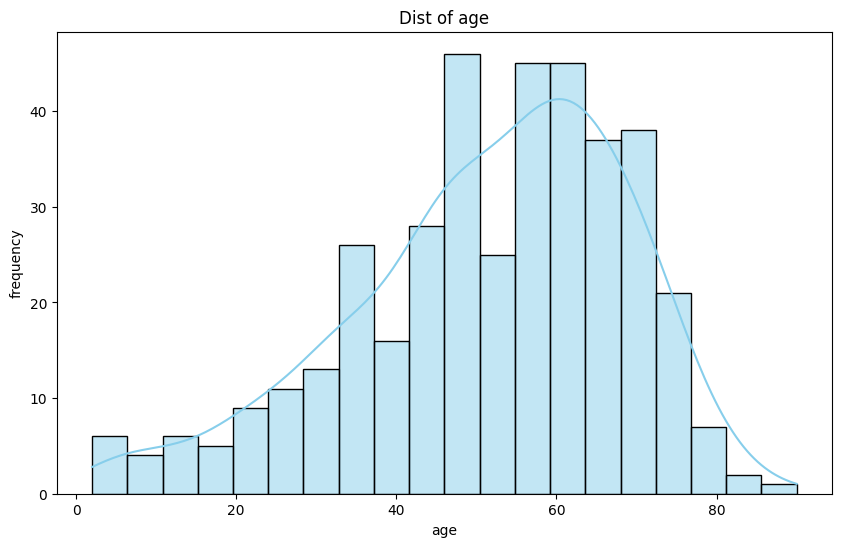

In [35]:
plt.figure(figsize=(10,6))
sns.histplot(df['age'].dropna(),kde=True,bins=20,color='skyblue')
plt.title('Dist of age')
plt.xlabel('age')
plt.ylabel('frequency')

plt.show()


In [36]:
## it is skewed

In [37]:
df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

<Axes: xlabel='htn', ylabel='count'>

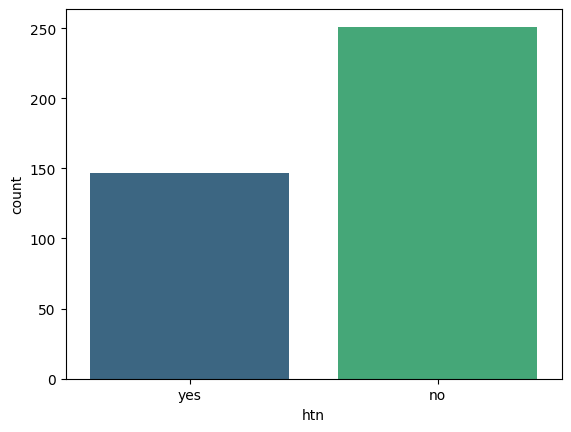

In [38]:
sns.countplot(x='htn',data=df,palette='viridis')

<Axes: xlabel='classification', ylabel='bu'>

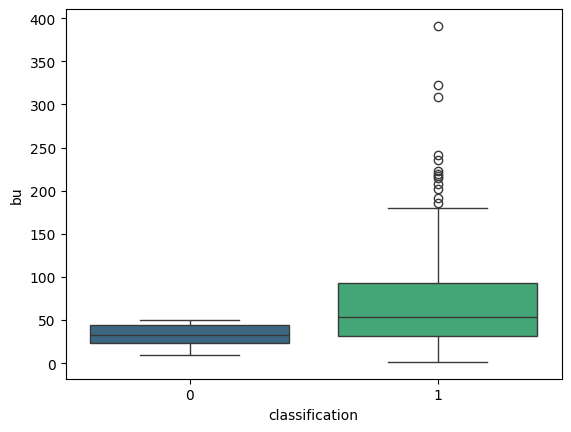

In [39]:
sns.boxplot(x='classification',y='bu',data=df,palette='viridis')

In [40]:
# insights >> people with kidney disease has higher level of blood urea

<Axes: xlabel='classification', ylabel='sc'>

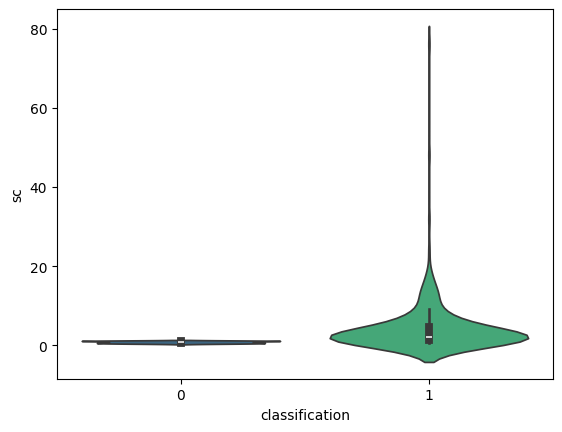

In [41]:
sns.violinplot(x='classification',y='sc',data=df,palette='viridis')

In [42]:
df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

<Axes: xlabel='ane', ylabel='count'>

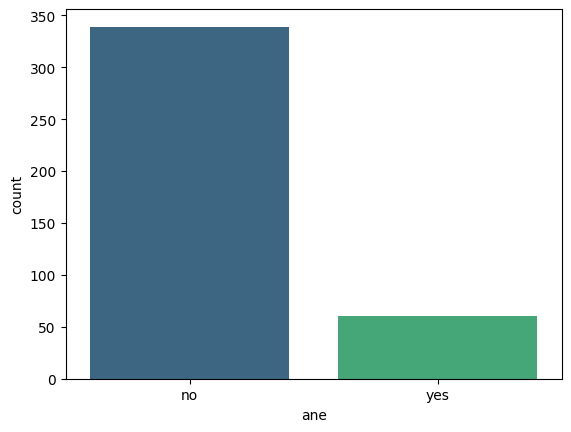

In [43]:
sns.countplot(x='ane',data=df,palette='viridis')

In [44]:
# majority people not suffering from anemia

<Axes: ylabel='count'>

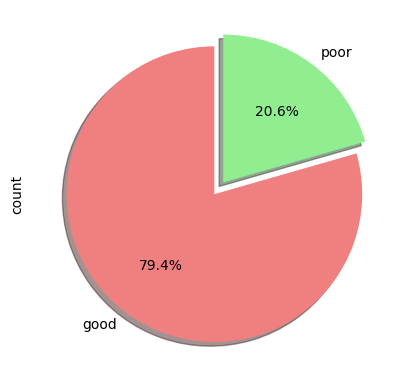

In [46]:
df.appet.value_counts().plot.pie(autopct='%1.1f%%',colors=['lightcoral','lightgreen'],explode=(0,0.1),startangle=90,shadow=True)

In [47]:
## most of the people have a good appetite

<Axes: xlabel='pcc', ylabel='count'>

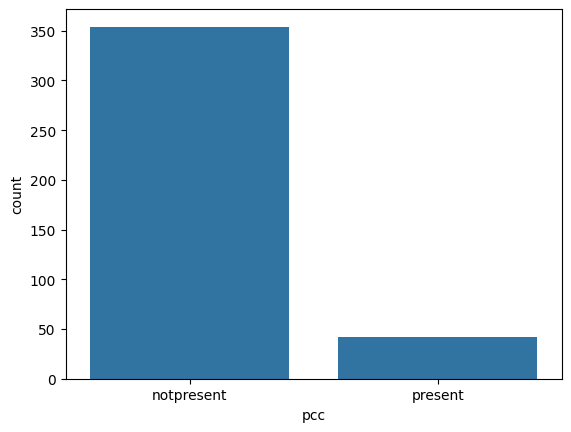

In [48]:
sns.countplot(x='pcc',data=df)

In [49]:
df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

<Axes: xlabel='wc', ylabel='Count'>

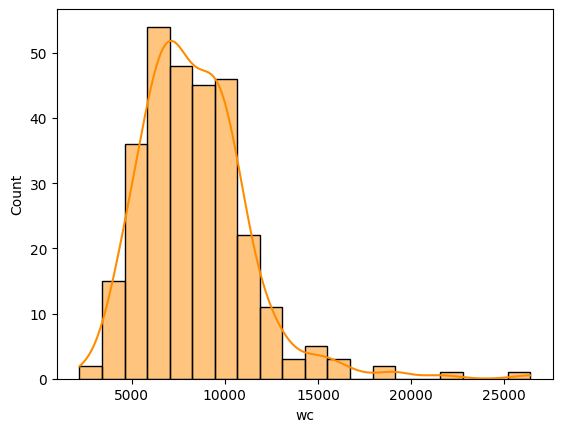

In [52]:
sns.histplot(df['wc'].dropna(),bins=20,kde=True,color='darkorange')

<Axes: ylabel='count'>

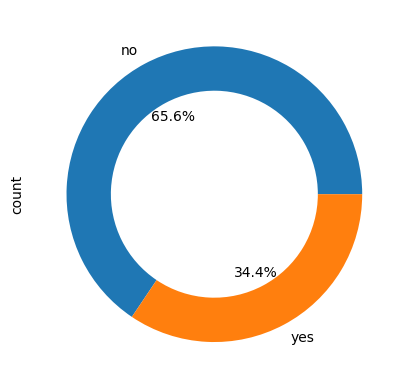

In [53]:
df['dm'].value_counts().plot.pie(autopct='%1.1f%%',wedgeprops=dict(width=0.3))

In [54]:
df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

<Axes: xlabel='age', ylabel='bp'>

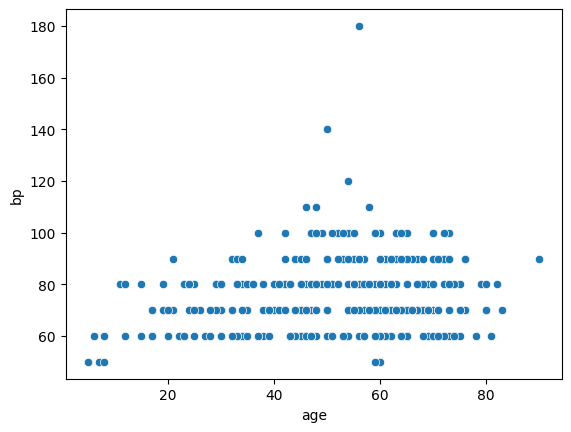

In [55]:
sns.scatterplot(x='age',y='bp',data=df)

<Axes: xlabel='age', ylabel='bp'>

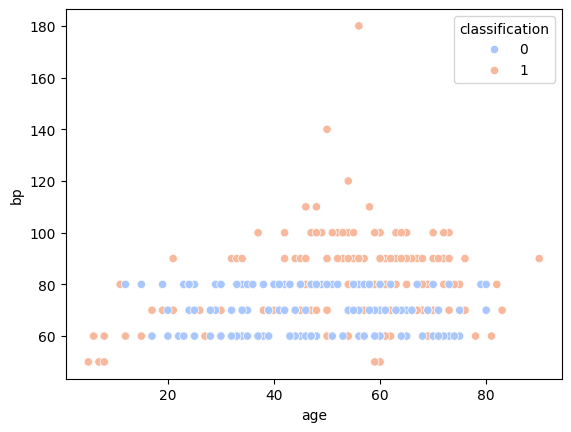

In [58]:
sns.scatterplot(x = 'age', y = 'bp', data = df, hue = 'classification', palette = 'coolwarm')

<Axes: >

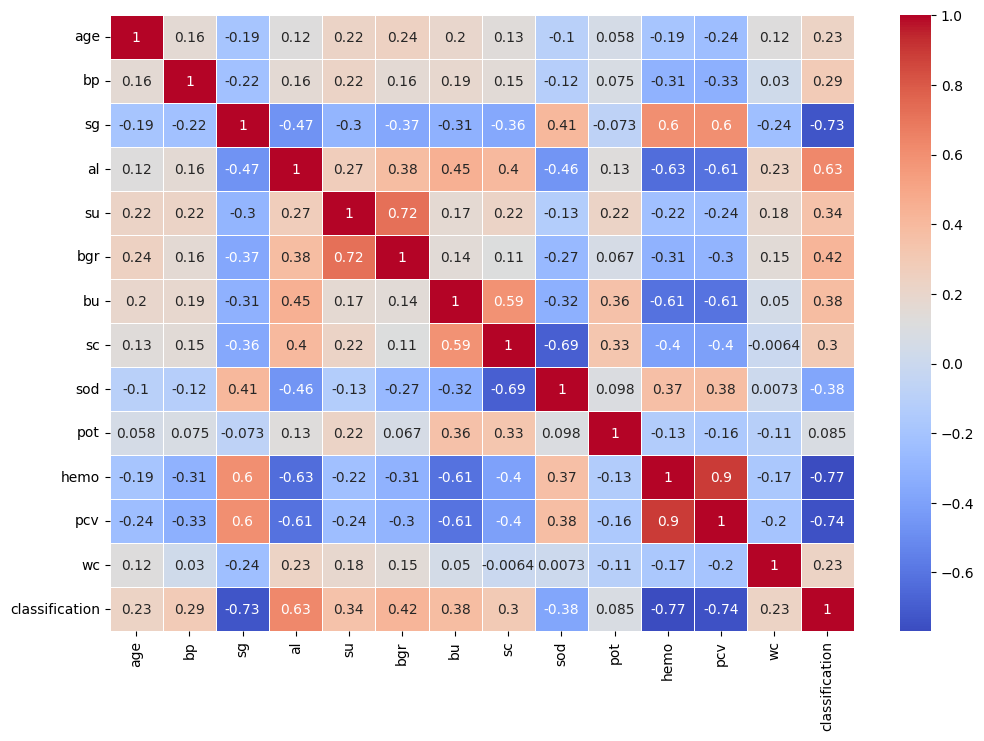

In [59]:
corr = df.corr(numeric_only=True)
plt.figure(figsize = (12, 8))
sns.heatmap(corr, annot = True, cmap = 'coolwarm', linewidth = .5)

<Axes: xlabel='dm', ylabel='age'>

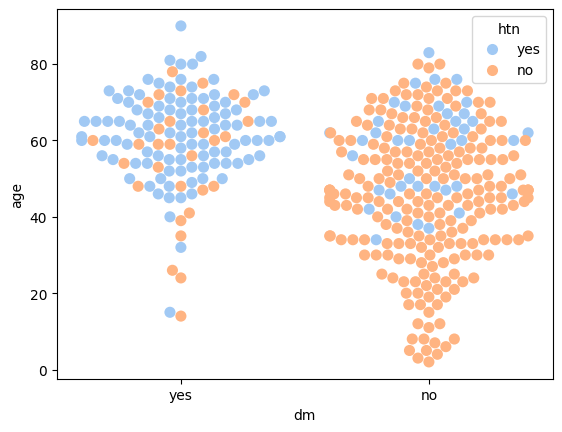

In [60]:
sns.swarmplot(x='dm', y='age', hue='htn', data=df, palette='pastel', size=8)

In [61]:
import plotly.graph_objects as go

data_corr = df.corr(numeric_only = True)
fig = go.Figure(data =go.Heatmap(z = data_corr.values,
                          x = data_corr.columns,
                          y=data_corr.index))
fig.show()